## `Imports`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
# setting random seed
np.random.seed(24)

#### Set up

In [3]:
# reading in data
X_train = pd.read_csv('../data/X_train_b.csv')
X_test = pd.read_csv('../data/X_test_b.csv')
y_train = np.load('../data/y_train.npy')
y_test = np.load('../data/y_test.npy')

In [4]:
# combine X_train and y_train
train_target = pd.Series(y_train)
train = pd.concat([X_train, train_target], axis=1)
train = train.rename(columns={0: 'country_destination'});

# combine X_test and y_test
test_target = pd.Series(y_test)
test = pd.concat([X_test, test_target], axis=1)
test = test.rename(columns={0: 'country_destination'});

# combine train and test sets
eda = pd.concat([train, test], axis=0)

# instantiate label encoder
le = LabelEncoder()

# fit and transform target col
eda['country_destination'] = le.fit_transform(eda['country_destination'])

In [5]:
# target 
y = eda['country_destination'].copy()

In [6]:
# correlation df
eda_corr = eda.corr()

In [7]:
y_corr = eda_corr['country_destination'].copy()

## `Feature Selection`

#### Remove null corrleations

In [8]:
eda_corr['country_destination'].sort_values(ascending=False)

country_destination                   1.000000
quarter_first_booking_2               0.319451
action_type_booking_request           0.201196
month_first_booking_6                 0.184727
days_until_booked_1                   0.183476
                                        ...   
action_detail_view_locations               NaN
action_detail_view_reservations            NaN
action_detail_view_resolutions             NaN
action_detail_view_security_checks         NaN
action_detail_view_user_real_names         NaN
Name: country_destination, Length: 2752, dtype: float64

In [9]:
# features with homogenous values i.e. null corrleation
null_corr = [each for each in eda_corr[eda_corr['country_destination'].isnull()]['country_destination'].index]

# dropping columns with homogenous values i.e. null correlations
eda = eda.drop(columns=null_corr)
X_train = X_train.drop(columns=null_corr)
X_test = X_test.drop(columns=null_corr)

In [10]:
print(f'Features remaining: {len(X_train.columns)}')

Features remaining: 2695


#### Remove <.01 correlations

In [11]:
# keeping features with above .01 correlation
above_01_corr = [each for each in eda_corr[abs(eda_corr['country_destination'])>=.01]['country_destination'].drop_duplicates().index]
above_01_corr.remove('country_destination')

eda = eda[above_01_corr]
eda['country_destination'] = y
X_train = X_train[above_01_corr]
X_test = X_test[above_01_corr]

# features remaining
print(f'Features remaining: {len(above_01_corr)}')

Features remaining: 1095


In [12]:
# save sets 
X_train.to_csv('../data/X_train_b_cleaned.csv', index=False) 
X_test.to_csv('../data/X_test_b_cleaned.csv', index=False)

**Notes**:
* Baseline data
* Dropped columns with correlations less than .01

In [13]:
# update correlation
eda_corr = eda.corr()

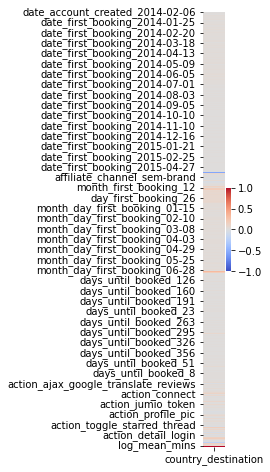

In [14]:
# heatmap of correlation
plt.figure(figsize=(.5,8))
sns.heatmap(eda_corr[['country_destination']], vmin=-1, vmax=1, cmap='coolwarm');

In [15]:
eda_corr['country_destination'].sort_values(ascending=False)

country_destination             1.000000
quarter_first_booking_2         0.319451
action_type_booking_request     0.201196
month_first_booking_6           0.184727
days_until_booked_1             0.183476
                                  ...   
action_set_user                -0.053965
affiliate_channel_content      -0.054234
action_detail_create_listing   -0.055625
age_present                    -0.220553
date_first_booking_no date     -0.561418
Name: country_destination, Length: 1096, dtype: float64

#### Remove <.02 correlations

In [18]:
# keeping features with above .02 correlation
above_02_corr = [each for each in eda_corr[abs(eda_corr['country_destination'])>=.02]['country_destination'].drop_duplicates().index]
above_02_corr.remove('country_destination')

eda = eda[above_02_corr]
eda['country_destination'] = y
X_train = X_train[above_02_corr]
X_test = X_test[above_02_corr]

# features remaining
print(f'Features remaining: {len(above_02_corr)}')

In [19]:
X_train.to_csv('../data/X_train_b_cleaned02.csv')
X_test.to_csv('../data/X_test_b_cleaned02.csv')

#### Remove <.05 correlations

In [22]:
# keeping features with above .05 correlation
above_05_corr = [each for each in eda_corr[abs(eda_corr['country_destination'])>=.05]['country_destination'].drop_duplicates().index]

above_05_corr.remove('country_destination')

eda = eda[above_05_corr]
eda['country_destination'] = y.copy()
X_train = X_train[above_05_corr]
X_test = X_test[above_05_corr]

# features remaining
print(f'Features remaining: {len(above_05_corr)}')

In [23]:
X_train.to_csv('../data/X_train_b_cleaned05.csv', index=False)
X_test.to_csv('../data/X_test_b_cleaned05.csv', index=False)

#### Remove <.10 correlations

In [34]:
# keeping features with above .05 correlation
above_10_corr = [each for each in eda_corr[abs(eda_corr['country_destination'])>=.1]['country_destination'].drop_duplicates().index]

above_10_corr.remove('country_destination')

eda = eda[above_10_corr]
eda['country_destination'] = y.copy()
X_train = X_train[above_10_corr]
X_test = X_test[above_10_corr]

# features remaining
print(f'Features remaining: {len(above_10_corr)}')

Features remaining: 25


In [35]:
X_train.to_csv('../data/X_train_b_cleaned10.csv', index=False)
X_test.to_csv('../data/X_test_b_cleaned10.csv', index=False)

---

In [346]:
g2_corr = g2.copy()
le = LabelEncoder()
g2_corr['country_destination'] = le.fit_transform(g2_corr['country_destination'])
g2_corr = g2_corr.corr()

In [347]:
# correlation above absolute value of .1 
corr_above_10 = g2_corr[abs(g2_corr['country_destination'])>=.1]['country_destination']

# drop duplicate correlation values
corr_above_10 = corr_above_10.drop_duplicates()

# col names above .1
col_names_above_10 = [each for each in corr_above_10.index]
g2 = g2[col_names_above_10]

# features remaining
print(f'Features remaining: {len(corr_above_10)}')

Features remaining: 37


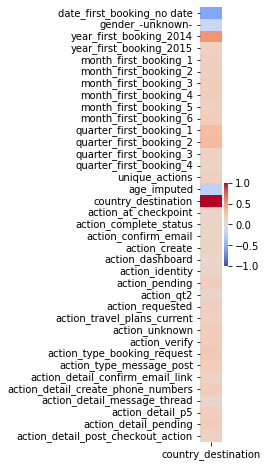

In [348]:
# g1 above 10 correlation
g2_above_10_corr = g2_corr[abs(g2_corr['country_destination'])>=.1][['country_destination']].drop_duplicates()

# heatmap of correlation
plt.figure(figsize=(.5,8))
sns.heatmap(g2_above_10_corr, vmin=-1, vmax=1, cmap='coolwarm');

In [11]:
g2_corr[abs(g2_corr['country_destination'])>=.05]['country_destination']

date_first_booking_no date                  -0.561418
gender_-unknown-                            -0.144054
gender_FEMALE                                0.080616
gender_MALE                                  0.086680
affiliate_channel_content                   -0.054234
                                               ...   
action_detail_send_message                   0.086979
action_detail_update_listing                -0.050520
action_detail_update_user_profile            0.071124
action_detail_user_profile_content_update    0.073306
action_detail_your_trips                     0.134503
Name: country_destination, Length: 145, dtype: float64

In [12]:
g2_corr[abs(g2_corr['country_destination'])<=.01]['country_destination']

date_account_created_2014-01-01   -0.003566
date_account_created_2014-01-02   -0.000212
date_account_created_2014-01-03    0.006091
date_account_created_2014-01-04   -0.001942
date_account_created_2014-01-05    0.000321
                                     ...   
action_detail_user_reviews        -0.007712
action_detail_user_tax_forms       0.001784
action_detail_wishlist_note        0.003342
action_detail_your_listings       -0.007516
action_detail_your_reservations   -0.002246
Name: country_destination, Length: 1282, dtype: float64

In [13]:
g1_corr[abs(g1_corr['country_destination'])<=.01]['country_destination']

date_account_created_2014-01-01     -0.003566
date_account_created_2014-01-02     -0.000212
date_account_created_2014-01-03      0.006091
date_account_created_2014-01-04     -0.001942
date_account_created_2014-01-05      0.000321
                                       ...   
action_detail_user_wishlists        -0.007830
action_detail_view_search_results   -0.002669
action_detail_wishlist               0.005394
action_detail_wishlist_note          0.004857
action_detail_your_reservations      0.001217
Name: country_destination, Length: 1307, dtype: float64

<AxesSubplot:>

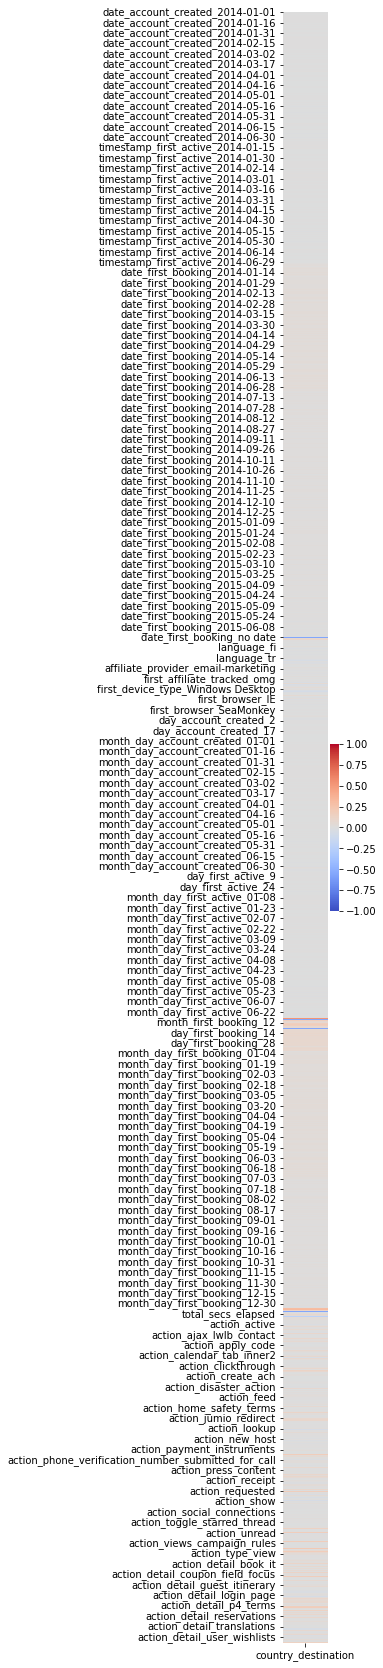

In [14]:
plt.figure(figsize=(1,30))
sns.heatmap(g2_corr[['country_destination']], vmin=-1, vmax=1, cmap='coolwarm')

#### g1_u: random undersample

In [27]:
g1['country_destination'].value_counts()

NDF      44116
US       19777
other     3606
FR        1417
IT         970
GB         724
ES         699
CA         431
DE         249
NL         245
AU         150
PT          81
Name: country_destination, dtype: int64

In [28]:
from my_scripts import u_samp

In [27]:
def u_samp(method, size, df):
    end = pd.DataFrame()
    if method == 'random':
        for each in list(set(df['country_destination'])):
            if df['country_destination'].value_counts().loc[each]>=size:
                sample = df[df['country_destination']==each].sample(n=size, random_state=24)
                end = pd.concat([end, sample], axis=0)
            else:
                og = df[df['country_destination']==each]
                end = pd.concat([end, og], axis=0)
    if method == 'oss':
        for each in 
    return end

In [29]:
g1_u1 = u_samp('random', 2000, g1)

In [31]:
oss = OneSidedSelection(n_neighbors=1, n_seeds_S=45_000)

In [34]:
ncr = NeighbourhoodCleaningRule()

In [35]:
X = g1.drop(columns=['user_id', 'country_destination'])
y = g1['country_destination']
le = LabelEncoder()
y = le.fit_transform(y)

In [80]:
y = pd.Series(y)

In [36]:
X_res, y_res = ncr.fit_resample(X, y)

In [ ]:
X_res, y_res = oss.fit_resample(X, y)

In [47]:
set(list(y_res))

{1, 2, 3, 4, 5, 6, 7, 9, 10, 11}

array([7, 7, 7, ..., 7, 7, 7])

In [246]:
g1[g1['country_destination']=='NDF'].sample(n=2000, random_state=24)

,date_account_created_2014-01-01,date_account_created_2014-01-02,date_account_created_2014-01-03,date_account_created_2014-01-04,date_account_created_2014-01-05,date_account_created_2014-01-06,date_account_created_2014-01-07,date_account_created_2014-01-08,date_account_created_2014-01-09,date_account_created_2014-01-10,...,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips,country_destination
43941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,0,0,0,1,0,0,0,2,NDF
44175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,193,0,0,0,120,0,0,0,0,NDF
19787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,NDF
21113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,NDF
31723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,0,0,0,0,0,NDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21,0,0,0,6,0,0,0,0,NDF
46149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,NDF
1198,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,NDF
41717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,NDF


#### g2_u

In [55]:
# subsamples
df_s_1 = df[df['country_destination']=='NDF'].sample(n=6000, random_state=24)
df_s_2 = df[df['country_destination']=='US'].sample(n=6000, random_state=24)
df_s_3 = df[df['country_destination']=='other'].sample(n=6000, random_state=24)
df_s_4 = df[df['country_destination']=='FR'].sample(n=6000, random_state=24)
df_s_5 = df[df['country_destination']=='IT'].sample(n=6000, random_state=24)
df_s_6 = df[df['country_destination']=='ES'].sample(n=6000, random_state=24)
df_s_7 = df[df['country_destination']=='GB'].sample(n=6000, random_state=24)
df_s_8 = df[df['country_destination']=='CA'].sample(n=6000, random_state=24)
df_s_9 = df[df['country_destination']=='DE'].sample(n=6000, random_state=24)
df_s_10 = df[df['country_destination']=='NL'].sample(n=6000, random_state=24)
df_s_11 = df[df['country_destination']=='AU'].sample(n=6000, random_state=24)
df_s_12 = df[df['country_destination']=='PT'].sample(n=6000, random_state=24)

In [56]:
# merged dataframe sample
df_sample = pd.concat([df_s_1, df_s_2, df_s_3, df_s_4, df_s_5, df_s_6, df_s_7, df_s_8, df_s_9, df_s_10, df_s_11, df_s_12], axis=0)

# reset dataframe index 
df_sample.reset_index(drop=True, inplace=True)

#### g2_uo

---

#### g2_3

In [75]:
# list of unique users
users = list(set(df['user_id']))

In [88]:
# undersampled df limited by user 
sample_df = pd.DataFrame()
for each in users:
    x = df[df['user_id'] == each].sample(n=3, random_state=24, replace=True)
    sample_df = pd.concat([sample_df, x], axis=0)
    print(len(sample_df))

3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
189
192
195
198
201
204
207
210
213
216
219
222
225
228
231
234
237
240
243
246
249
252
255
258
261
264
267
270
273
276
279
282
285
288
291
294
297
300
303
306
309
312
315
318
321
324
327
330
333
336
339
342
345
348
351
354
357
360
363
366
369
372
375
378
381
384
387
390
393
396
399
402
405
408
411
414
417
420
423
426
429
432
435
438
441
444
447
450
453
456
459
462
465
468
471
474
477
480
483
486
489
492
495
498
501
504
507
510
513
516
519
522
525
528
531
534
537
540
543
546
549
552
555
558
561
564
567
570
573
576
579
582
585
588
591
594
597
600
603
606
609
612
615
618
621
624
627
630
633
636
639
642
645
648
651
654
657
660
663
666
669
672
675
678
681
684
687
690
693
696
699
702
705
708
711
714
717
720
723
726
729
732
735
738
741
744
747
750
753
756
759
762
765
768
771
774
777


In [89]:
sample_df.shape

(217395, 38)

In [235]:
sample_df.to_csv('../data/g2_3.csv', index=False)

In [240]:
df

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,month_day_first_booking,count_action,total_secs_elapsed,unique_actions,mean_secs_elapsed_per_action,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,01-04,126,3427529.0,16,27202.611111,lookup,-unknown-,-unknown-,Windows Desktop,319.0
1,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,01-04,126,3427529.0,16,27202.611111,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,01-04,126,3427529.0,16,27202.611111,lookup,-unknown-,-unknown-,Windows Desktop,301.0
3,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,01-04,126,3427529.0,16,27202.611111,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,01-04,126,3427529.0,16,27202.611111,lookup,-unknown-,-unknown-,Windows Desktop,435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449845,nw9fwlyb5f,2014-06-30,2014-06-30,no date,-unknown-,basic,25,en,direct,direct,...,no date,40,2759210.0,13,68980.250000,index,data,reservations,iPhone,245.0
5449846,nw9fwlyb5f,2014-06-30,2014-06-30,no date,-unknown-,basic,25,en,direct,direct,...,no date,40,2759210.0,13,68980.250000,unavailabilities,data,unavailable_dates,iPhone,286.0
5449847,nw9fwlyb5f,2014-06-30,2014-06-30,no date,-unknown-,basic,25,en,direct,direct,...,no date,40,2759210.0,13,68980.250000,notifications,submit,notifications,iPhone,830.0
5449848,nw9fwlyb5f,2014-06-30,2014-06-30,no date,-unknown-,basic,25,en,direct,direct,...,no date,40,2759210.0,13,68980.250000,search,click,view_search_results,iPhone,101961.0


In [21]:
ohe = OneHotEncoder()

In [22]:
df_sess = pd.DataFrame(ohe.fit_transform(df[[
    'action',
    'action_type',
    'action_detail',
    'device_type'
]]).toarray(), columns=ohe.get_feature_names_out([
    'action',
    'action_type',
    'action_detail',
    'device_type'
]))

In [24]:
df_sess['user_id'] = df['user_id']
df_sess['country_destination'] = df['country_destination']

In [46]:
df_sess.shape

(5449850, 485)

In [ ]:
df_s_1 = df_sess[df_sess['country_destination']=='NDF'].sample(n=2000, random_state=24)
df_s_2 = df_sess[df_sess['country_destination']=='US'].sample(n=2000, random_state=24)
df_s_3 = df_sess[df_sess['country_destination']=='other'].sample(n=2000, random_state=24)
df_s_4 = df_sess[df_sess['country_destination']=='FR'].sample(n=2000, random_state=24)
df_s_5 = df_sess[df_sess['country_destination']=='IT'].sample(n=2000, random_state=24)
df_s_6 = df_sess[df_sess['country_destination']=='ES'].sample(n=2000, random_state=24)
df_s_7 = df_sess[df_sess['country_destination']=='GB'].sample(n=2000, random_state=24)
df_s_8 = df_sess[df_sess['country_destination']=='CA'].sample(n=2000, random_state=24)
df_s_9 = df_sess[df_sess['country_destination']=='DE'].sample(n=2000, random_state=24)
df_s_10 = df_sess[df_sess['country_destination']=='NL'].sample(n=2000, random_state=24)
df_s_11 = df_sess[df_sess['country_destination']=='AU'].sample(n=2000, random_state=24)
df_s_12 = df_sess[df_sess['country_destination']=='PT'].sample(n=2000, random_state=24)

In [27]:
df_sess.to_csv('../data/df_sess.csv', index=False)

#### Read in data

In [3]:
ohe_df = pd.read_csv('../data/ohe_df.csv')

In [3]:
df_sess = pd.read_csv('../data/df_sess.csv')

MemoryError: Unable to allocate 19.6 GiB for an array with shape (483, 5449850) and data type float64

In [ ]:
df_sess.shape

In [30]:
ohe_df.merge(df_sess, on='user_id')

MemoryError: Unable to allocate 19.6 GiB for an array with shape (483, 5449850) and data type float64

In [21]:
ohe_df['country_destination'] = df['country_destination']

In [22]:
le = LabelEncoder()
ohe_df['country_destination'] = le.fit_transform(ohe_df['country_destination'])

In [23]:
ohe_df['country_destination']

0        11
1         7
2         7
3         7
4         5
         ..
72460     7
72461     7
72462     7
72463     7
72464     7
Name: country_destination, Length: 72465, dtype: int32

In [28]:
ohe_df_corr = ohe_df.corr()['country_destination'].sort_values(ascending=False)

country_destination           1.000000
year_first_booking_2014       0.526190
month_first_booking_6         0.184727
month_first_booking_3         0.172452
month_first_booking_4         0.171935
                                ...   
day_first_booking_no date    -0.561418
year_first_booking_no date   -0.561418
date_first_booking_no date   -0.561418
year_account_created_2014          NaN
year_first_active_2014             NaN
Name: country_destination, Length: 1872, dtype: float64

In [27]:
ohe_df['country_destination'].value_counts()

7     44116
10    19777
11     3606
4      1417
6       970
5       724
3       699
1       431
2       249
8       245
0       150
9        81
Name: country_destination, dtype: int64

In [60]:
# save preprocessed csv
ohe_df.to_csv('../data/ohe_df.csv', index=False)

In [63]:
# reading in merged dataframe
df_test = pd.read_csv('../data/train_session_cleaned.csv')

In [31]:
# sample 
df_sample_1 = ohe_df[ohe_df['country_destination']==7].sample(n=500, random_state=24)

df_sample_2 = ohe_df[ohe_df['country_destination']==10].sample(n=500, random_state=24)

df_sample_3 = ohe_df[ohe_df['country_destination']==11].sample(n=500, random_state=24)

df_sample_4 = ohe_df[ohe_df['country_destination']==4].sample(n=500, random_state=24)

df_sample_5 = ohe_df[ohe_df['country_destination']==6].sample(n=500, random_state=24)

df_sample_6 = ohe_df[ohe_df['country_destination']==5].sample(n=500, random_state=24)

df_sample_7 = ohe_df[ohe_df['country_destination']==3].sample(n=500, random_state=24)

In [33]:
df_8 = ohe_df[ohe_df['country_destination']==1]
df_9 = ohe_df[ohe_df['country_destination']==2]
df_10 = ohe_df[ohe_df['country_destination']==8]
df_11 = ohe_df[ohe_df['country_destination']==0]
df_12 = ohe_df[ohe_df['country_destination']==9]

In [34]:
df_sample = pd.concat([df_sample_1, df_sample_2, df_sample_3, df_sample_4, df_sample_5, df_sample_6, df_sample_7, df_8, df_9, df_10, df_11, df_12], axis=0)

In [35]:
df_sample['country_destination'].value_counts()

7     500
10    500
11    500
4     500
6     500
5     500
3     500
1     431
2     249
8     245
0     150
9      81
Name: country_destination, dtype: int64

In [46]:
# setting X and y
X = df_sample.drop(columns=['country_destination'])
y = df_sample['country_destination']

In [51]:
# instantiating SMOTE
sm = SMOTE(random_state=24)

In [52]:
# fit and resample oversample
X, y = sm.fit_resample(X, y)

In [56]:
X

,date_account_created_2014-01-01,date_account_created_2014-01-02,date_account_created_2014-01-03,date_account_created_2014-01-04,date_account_created_2014-01-05,date_account_created_2014-01-06,date_account_created_2014-01-07,date_account_created_2014-01-08,date_account_created_2014-01-09,date_account_created_2014-01-10,...,month_day_first_booking_12-29,month_day_first_booking_12-30,month_day_first_booking_12-31,month_day_first_booking_no date,signup_flow,age_imp_values,count_action,total_secs_elapsed,unique_actions,mean_secs_elapsed_per_action
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,38,93,1.211827e+06,13,13030.397849
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,29,594,1.164538e+07,13,19605.018519
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,25,27,10,2.498000e+06,3,249800.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,37,8,1.207658e+06,7,150957.250000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,25,37,27,2.158360e+05,7,7993.925926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,35,58,2.275908e+06,15,50374.696002
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,25,27,4.669598e+05,8,35045.903630
5997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,32,157,1.765567e+06,22,11686.112019
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,37,16,7.149582e+04,8,20227.450033


In [55]:
# check value counts
y.value_counts()

7     500
10    500
11    500
4     500
6     500
5     500
3     500
1     500
2     500
8     500
0     500
9     500
Name: country_destination, dtype: int64

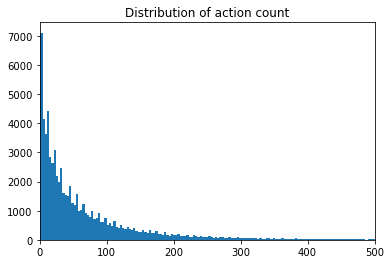

In [80]:
plt.hist(temp_df['count_action'], bins=800)
plt.xlim(0, 500)
plt.title('Distribution of action count');

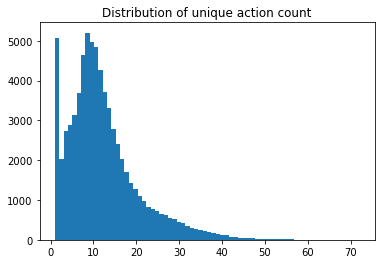

In [59]:
plt.hist(temp_df['unique_actions'], bins=70)
plt.title('Distribution of unique action count');

In [15]:
# merge train df and sess df
n_df = train.merge(sess, on='user_id')

In [16]:
# merge n_df and session df
n_df = n_df.merge(session, on='user_id')

In [89]:
session

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,-unknown-,-unknown-,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,-unknown-,-unknown-,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,-unknown-,-unknown-,Windows Desktop,435.0
...,...,...,...,...,...,...
10397753,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10397754,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10397755,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10397756,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [113]:
ohe = OneHotEncoder()

In [93]:
train_session_df = train.merge(session, on='user_id')

In [110]:
country_destination = train[['user_id', 'country_destination']].copy()

In [111]:
country_destination = country_destination.merge(session, on='user_id')

In [112]:
country_destination

,user_id,country_destination,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,other,lookup,-unknown-,-unknown-,Windows Desktop,319.0
1,d1mm9tcy42,other,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,other,lookup,-unknown-,-unknown-,Windows Desktop,301.0
3,d1mm9tcy42,other,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,other,lookup,-unknown-,-unknown-,Windows Desktop,435.0
...,...,...,...,...,...,...,...
5449845,nw9fwlyb5f,NDF,index,data,reservations,iPhone,245.0
5449846,nw9fwlyb5f,NDF,unavailabilities,data,unavailable_dates,iPhone,286.0
5449847,nw9fwlyb5f,NDF,notifications,submit,notifications,iPhone,830.0
5449848,nw9fwlyb5f,NDF,search,click,view_search_results,iPhone,101961.0


In [109]:
train.head()

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,day_account_created,month_day_account_created,year_first_active,month_first_active,day_first_active,month_day_first_active,year_first_booking,month_first_booking,day_first_booking,month_day_first_booking
0,gxn3p5htnn,2010-06-28,2009-03-19,no date,-unknown-,facebook,0,en,direct,direct,...,28,06-28,2009,3,19,03-19,no date,no date,no date,no date
1,820tgsjxq7,2011-05-25,2009-05-23,no date,MALE,facebook,0,en,seo,google,...,25,05-25,2009,5,23,05-23,no date,no date,no date,no date
2,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,FEMALE,basic,3,en,direct,direct,...,28,09-28,2009,6,9,06-09,2010,8,2,08-02
3,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,FEMALE,facebook,0,en,direct,direct,...,5,12-05,2009,10,31,10-31,2012,9,8,09-08
4,87mebub9p4,2010-09-14,2009-12-08,2010-02-18,-unknown-,basic,0,en,direct,direct,...,14,09-14,2009,12,8,12-08,2010,2,18,02-18


In [108]:
session

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,-unknown-,-unknown-,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,-unknown-,-unknown-,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,-unknown-,-unknown-,Windows Desktop,435.0
...,...,...,...,...,...,...
10397753,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10397754,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10397755,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10397756,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [96]:
train_session_df['country_destination'].value_counts()

NDF      3004858
US       1651366
other     316666
FR        144576
IT        100407
ES         65625
GB         64131
CA         38858
DE         23141
NL         22316
AU         11862
PT          6044
Name: country_destination, dtype: int64

In [114]:
session_df = pd.DataFrame(ohe.fit_transform(train_session_df[[
    'action',
    'action_type',
    'action_detail',
    'device_type'
]]).toarray(), columns=ohe.get_feature_names_out([
    'action',
    'action_type',
    'action_detail',
    'device_type'
]))

In [ ]:
session_df.value_counts

In [ ]:
session_df.value_counts()

In [ ]:
ohe_df

In [21]:
ohe_df.shape

(10397758, 539)

In [23]:
ohe_df.columns

Index(['action_10', 'action_11', 'action_12', 'action_15', 'action_about_us',
       'action_accept_decline', 'action_account',
       'action_acculynk_bin_check_failed', 'action_acculynk_bin_check_success',
       'action_acculynk_load_pin_pad',
       ...
       'device_type_Chromebook', 'device_type_Linux Desktop',
       'device_type_Mac Desktop', 'device_type_Opera Phone',
       'device_type_Tablet', 'device_type_Windows Desktop',
       'device_type_Windows Phone', 'device_type_iPad Tablet',
       'device_type_iPhone', 'device_type_iPodtouch'],
      dtype='object', length=539)

In [116]:
n_df.groupby(by='user_id')['country_destination'].unique().value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[NDF]      44116
[US]       19777
[other]     3606
[FR]        1417
[IT]         970
[GB]         724
[ES]         699
[CA]         431
[DE]         249
[NL]         245
[AU]         150
[PT]          81
Name: country_destination, dtype: int64

In [117]:
n_df

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,month_day_first_booking,count_action,total_secs_elapsed,unique_actions,mean_secs_elapsed_per_action,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,01-04,126,3427529.0,16,27202.611111,lookup,-unknown-,-unknown-,Windows Desktop,319.0
1,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,01-04,126,3427529.0,16,27202.611111,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,01-04,126,3427529.0,16,27202.611111,lookup,-unknown-,-unknown-,Windows Desktop,301.0
3,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,01-04,126,3427529.0,16,27202.611111,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,01-04,126,3427529.0,16,27202.611111,lookup,-unknown-,-unknown-,Windows Desktop,435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449845,nw9fwlyb5f,2014-06-30,2014-06-30,no date,-unknown-,basic,25,en,direct,direct,...,no date,40,2759210.0,13,68980.250000,index,data,reservations,iPhone,245.0
5449846,nw9fwlyb5f,2014-06-30,2014-06-30,no date,-unknown-,basic,25,en,direct,direct,...,no date,40,2759210.0,13,68980.250000,unavailabilities,data,unavailable_dates,iPhone,286.0
5449847,nw9fwlyb5f,2014-06-30,2014-06-30,no date,-unknown-,basic,25,en,direct,direct,...,no date,40,2759210.0,13,68980.250000,notifications,submit,notifications,iPhone,830.0
5449848,nw9fwlyb5f,2014-06-30,2014-06-30,no date,-unknown-,basic,25,en,direct,direct,...,no date,40,2759210.0,13,68980.250000,search,click,view_search_results,iPhone,101961.0


(array([125011.,   1672.,   2979.,   5939.,   8406.,  11752.,  18116.,
         23647.,  12937.,   2082.]),
 array([   0. ,  197.6,  395.2,  592.8,  790.4,  988. , 1185.6, 1383.2,
        1580.8, 1778.4, 1976. ]),
 <BarContainer object of 10 artists>)

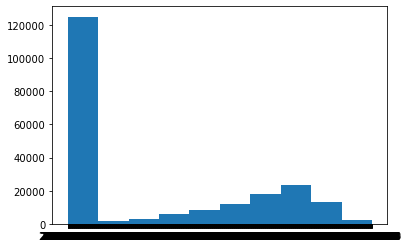

In [24]:
plt.hist(train['date_first_booking'])

(array([131789.,   9715.,  10047.,  11745.,  11034.,   9146.,   7947.,
          7426.,   6890.,   6802.]),
 array([  0. ,  36.6,  73.2, 109.8, 146.4, 183. , 219.6, 256.2, 292.8,
        329.4, 366. ]),
 <BarContainer object of 10 artists>)

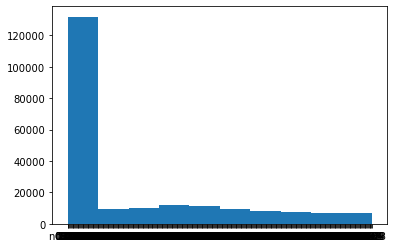

In [25]:
plt.hist(train['month_day_first_booking'])

In [5]:
# timestamp first active to datetime
# train['timestamp_first_active'] = [dt.datetime.strptime(str(x), '%Y%m%d%H%M%S') for x in train['timestamp_first_active']]

In [55]:
n_df.head()

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,age_imputed,year_first_booking,month_first_booking,day_first_booking,month_day_first_booking,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,0,2014,1,4,01-04,lookup,-unknown-,-unknown-,Windows Desktop,319.0
1,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,0,2014,1,4,01-04,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,0,2014,1,4,01-04,lookup,-unknown-,-unknown-,Windows Desktop,301.0
3,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,0,2014,1,4,01-04,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,0,2014,1,4,01-04,lookup,-unknown-,-unknown-,Windows Desktop,435.0


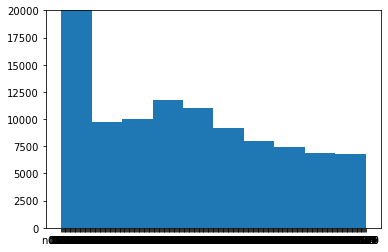

In [41]:
plt.hist(train['month_day_first_booking'])
plt.ylim(0, 20_000);

(array([126245.,   1071.,   5076.,   7726.,   4892.,  20915.,  11756.,
         19658.,  12837.,   2365.]),
 array([ 0. ,  6.6, 13.2, 19.8, 26.4, 33. , 39.6, 46.2, 52.8, 59.4, 66. ]),
 <BarContainer object of 10 artists>)

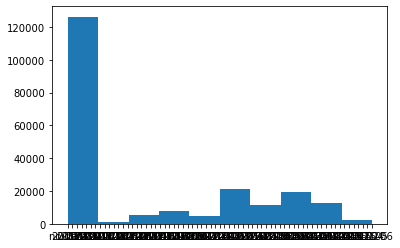

In [26]:
plt.hist(train['period_first_booking'])

In [18]:
train

,user_id,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,day_account_created,month_day_account_created,year_first_active,month_first_active,day_first_active,month_day_first_active,year_first_booking,month_first_booking,day_first_booking,month_day_first_booking
0,gxn3p5htnn,no date,-unknown-,facebook,0,en,direct,direct,untracked,Web,...,28,06-28,2009,3,19,03-19,no date,no date,no date,no date
1,820tgsjxq7,no date,MALE,facebook,0,en,seo,google,untracked,Web,...,25,05-25,2009,5,23,05-23,no date,no date,no date,no date
2,4ft3gnwmtx,2010-08-02,FEMALE,basic,3,en,direct,direct,untracked,Web,...,28,09-28,2009,6,9,06-09,2010,8,2,08-02
3,bjjt8pjhuk,2012-09-08,FEMALE,facebook,0,en,direct,direct,untracked,Web,...,5,12-05,2009,10,31,10-31,2012,9,8,09-08
4,87mebub9p4,2010-02-18,-unknown-,basic,0,en,direct,direct,untracked,Web,...,14,09-14,2009,12,8,12-08,2010,2,18,02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212536,zxodksqpep,no date,MALE,basic,0,en,sem-brand,google,omg,Web,...,30,06-30,2014,6,30,06-30,no date,no date,no date,no date
212537,mhewnxesx9,no date,-unknown-,basic,0,en,direct,direct,linked,Web,...,30,06-30,2014,6,30,06-30,no date,no date,no date,no date
212538,6o3arsjbb4,no date,-unknown-,basic,0,en,direct,direct,untracked,Web,...,30,06-30,2014,6,30,06-30,no date,no date,no date,no date
212539,jh95kwisub,no date,-unknown-,basic,25,en,other,other,tracked-other,iOS,...,30,06-30,2014,6,30,06-30,no date,no date,no date,no date


(array([131789.,   9715.,  10047.,  11745.,  11034.,   9146.,   7947.,
          7426.,   6890.,   6802.]),
 array([  0. ,  36.6,  73.2, 109.8, 146.4, 183. , 219.6, 256.2, 292.8,
        329.4, 366. ]),
 <BarContainer object of 10 artists>)

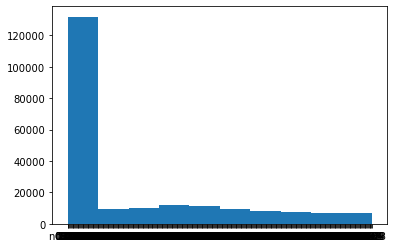

In [20]:
plt.hist(train['month_day_first_booking'])

(array([125011.,   1672.,   2979.,   5939.,   8406.,  11752.,  18116.,
         23647.,  12937.,   2082.]),
 array([   0. ,  197.6,  395.2,  592.8,  790.4,  988. , 1185.6, 1383.2,
        1580.8, 1778.4, 1976. ]),
 <BarContainer object of 10 artists>)

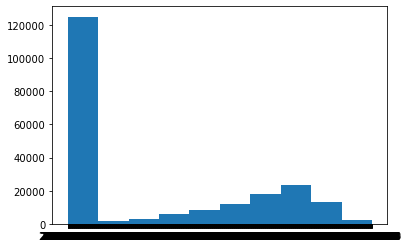

In [21]:
plt.hist(train['date_first_booking'])

In [5]:
train['date_first_booking'] = [pd.to_datetime(0) if each=='no date' else pd.to_datetime(each) for each in train['date_first_booking']]

In [56]:
train['period_first_booking'] = [each if each == 'no date' else str(pd.to_datetime(each).to_period('M')) for each in train['date_first_booking']]

In [120]:
train

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_imp_values,imputed
0,gxn3p5htnn,2010-06-28,2009-03-19,no date,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,37.453164,1.0
1,820tgsjxq7,2011-05-25,2009-05-23,no date,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,38.000000,0.0
2,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,56.000000,0.0
3,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,42.000000,0.0
4,87mebub9p4,2010-09-14,2009-12-08,2010-02-18,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,41.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212536,zxodksqpep,2014-06-30,2014-06-30,no date,MALE,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,32.000000,0.0
212537,mhewnxesx9,2014-06-30,2014-06-30,no date,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,37.453164,1.0
212538,6o3arsjbb4,2014-06-30,2014-06-30,no date,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,32.000000,0.0
212539,jh95kwisub,2014-06-30,2014-06-30,no date,-unknown-,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,37.453164,1.0


In [78]:
train['date_first_booking'] = [each if each == 'no date' else each[5:] for each in train['date_first_booking']]

(array([131789.,   9715.,  10047.,  11745.,  11034.,   9146.,   7947.,
          7426.,   6890.,   6802.]),
 array([  0. ,  36.6,  73.2, 109.8, 146.4, 183. , 219.6, 256.2, 292.8,
        329.4, 366. ]),
 <BarContainer object of 10 artists>)

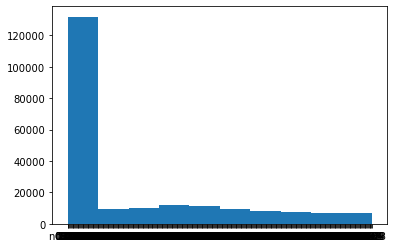

In [81]:
plt.hist(train['date_first_booking'])

In [77]:
train['date_first_booking'][3][5:]

'09-08'

In [68]:
time = [pd.to_datetime(each).quarter for each in train[train['date_first_booking']!='no date']['date_first_booking']]

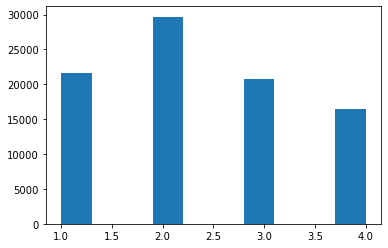

In [69]:
plt.hist(time);

In [7]:
train['year_first_booking'] = [-1 if each=='no date' else pd.to_datetime(each).year for each in train['date_first_booking']]

In [8]:
train['month_first_booking'] = [-1 if each=='no date' else pd.to_datetime(each).month for each in train['date_first_booking']]

In [9]:
train['day_first_booking'] = [-1 if each=='no date' else pd.to_datetime(each).day for each in train['date_first_booking']]

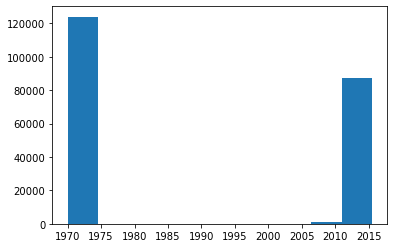

In [7]:
plt.hist(train['date_first_booking']);

## `Feature Engineering`

In [538]:
# added booked feature
train['booked'] = [0 if each == 'no date' else 1 for each in train['date_first_booking']]

In [539]:
train['account_year_created'] = [each.year for each in train['date_account_created']]

In [540]:
train['account_month_created'] = [each.month for each in train['date_account_created']]

In [541]:
train['account_day_created'] = [each.day for each in train['date_account_created']]

In [542]:
train['year_first_active'] = [each.year for each in train['timestamp_first_active']]

In [543]:
train['month_first_active'] = [each.month for each in train['timestamp_first_active']]

In [544]:
train['day_first_active'] = [each.day for each in train['timestamp_first_active']]

In [545]:
train.corr()

,signup_flow,age_imp_values,imputed,booked,account_year_created,account_month_created,account_day_created,year_first_active,month_first_active,day_first_active
signup_flow,1.000000,-5.430318e-02,1.175192e-01,-0.094191,0.195492,-0.039149,0.014720,0.195319,-0.039050,0.014702
age_imp_values,-0.054303,1.000000e+00,2.118725e-15,-0.020372,-0.048601,0.008567,-0.003564,-0.048731,0.008506,-0.003596
imputed,0.117519,2.118725e-15,1.000000e+00,-0.315316,0.068027,-0.002011,0.003298,0.068440,-0.001971,0.003314
booked,-0.094191,-2.037221e-02,-3.153160e-01,1.000000,-0.084610,-0.006626,-0.008844,-0.084766,-0.006758,-0.008819
account_year_created,0.195492,-4.860105e-02,6.802746e-02,-0.084610,1.000000,-0.437226,0.003115,0.999320,-0.436852,0.003134
account_month_created,-0.039149,8.566993e-03,-2.010972e-03,-0.006626,-0.437226,1.000000,-0.012978,-0.436724,0.999261,-0.012906
account_day_created,0.014720,-3.564175e-03,3.298353e-03,-0.008844,0.003115,-0.012978,1.000000,0.003011,-0.012988,0.999266
year_first_active,0.195319,-4.873133e-02,6.844031e-02,-0.084766,0.999320,-0.436724,0.003011,1.000000,-0.436809,0.003129
month_first_active,-0.039050,8.506134e-03,-1.970882e-03,-0.006758,-0.436852,0.999261,-0.012988,-0.436809,1.000000,-0.013004
day_first_active,0.014702,-3.596306e-03,3.313595e-03,-0.008819,0.003134,-0.012906,0.999266,0.003129,-0.013004,1.000000


In [493]:
sess_df = pd.DataFrame(session.groupby(by='user_id')['action'].count())

In [519]:
sess_df.rename(columns={'action': 'action_count'}, inplace=True);

In [498]:
sess_df['total_secs']= session.groupby(by='user_id')['secs_elapsed'].sum()

In [504]:
action_types = session.groupby(by='user_id')['action'].unique()

[array(['index', 'dashboard', 'header_userpic', 'unknown', 'pending',
        'requested', 'travel_plans_current', 'show',
        'ajax_refresh_subtotal', 'similar_listings', 'confirm_email',
        'personalize', 'search_results'], dtype=object),
 array(['search_results', 'show', 'personalize', 'ajax_refresh_subtotal',
        'similar_listings_v2', 'header_userpic', 'dashboard', 'index',
        'how_it_works', 'custom_recommended_destinations'], dtype=object),
 array(['search', 'show', 'social_connections', 'index', 'active',
        'collections', 'campaigns', 'update', 'notifications'],
       dtype=object),
 array(['show', 'reviews', 'search', 'active'], dtype=object),
 array(['social_connections', 'payment_methods', 'create', 'show',
        'unavailabilities', 'payment_instruments', 'index', 'listings',
        'active', 'search', 'campaigns', 'notifications', 'reviews',
        'click', 'unknown', 'push_notification_callback', '10', 'update',
        'kba_update', 'kba', 'id

In [515]:
sess_df['unique_action'] = [len(list(each)) for each in action_types]

In [520]:
sess_df

,action_count,total_secs,unique_action
user_id,,,
00023iyk9l,39,867896.0,13
0010k6l0om,62,586543.0,10
001wyh0pz8,89,282965.0,9
0028jgx1x1,30,297010.0,4
002qnbzfs5,788,6487080.0,26
...,...,...,...
zzxox7jnrx,88,639436.0,27
zzy7t0y9cm,7,73771.0,6
zzysuoqg6x,2,1731.0,2


In [521]:
session

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,-unknown-,-unknown-,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,-unknown-,-unknown-,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,-unknown-,-unknown-,Windows Desktop,435.0
...,...,...,...,...,...,...
10397753,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10397754,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10397755,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10397756,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [8]:
ohe = OneHotEncoder()

In [664]:
ohe_df = pd.DataFrame(ohe.fit_transform(train[[
    'gender',
    'language',
    'affiliate_channel',
    'affiliate_provider',
    'first_affiliate_tracked',
    'signup_app',
    'first_device_type',
    'first_browser',
]]).toarray(), columns=ohe.get_feature_names(['gender',
    'language',
    'affiliate_channel',
    'affiliate_provider',
    'first_affiliate_tracked',
    'signup_app',
    'first_device_type',
    'first_browser'])
)

In [10]:
ohe_dates_df = pd.DataFrame(ohe.fit_transform(train[[
    'date_first_booking'
]]).toarray(), columns=ohe.get_feature_names_out(['date_first_booking'
                                             ]))

In [11]:
ohe_dates_df

,date_first_booking_1970-01-01T00:00:00.000000000,date_first_booking_2010-01-02T00:00:00.000000000,date_first_booking_2010-01-04T00:00:00.000000000,date_first_booking_2010-01-05T00:00:00.000000000,date_first_booking_2010-01-06T00:00:00.000000000,date_first_booking_2010-01-08T00:00:00.000000000,date_first_booking_2010-01-09T00:00:00.000000000,date_first_booking_2010-01-10T00:00:00.000000000,date_first_booking_2010-01-11T00:00:00.000000000,date_first_booking_2010-01-13T00:00:00.000000000,...,date_first_booking_2015-06-14T00:00:00.000000000,date_first_booking_2015-06-16T00:00:00.000000000,date_first_booking_2015-06-17T00:00:00.000000000,date_first_booking_2015-06-18T00:00:00.000000000,date_first_booking_2015-06-22T00:00:00.000000000,date_first_booking_2015-06-23T00:00:00.000000000,date_first_booking_2015-06-25T00:00:00.000000000,date_first_booking_2015-06-26T00:00:00.000000000,date_first_booking_2015-06-28T00:00:00.000000000,date_first_booking_2015-06-29T00:00:00.000000000
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212536,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212537,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212538,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212539,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
eda_dates = pd.concat([ohe_dates_df, y], axis=1)

In [ ]:
eda_dates.corr()

In [ ]:
eda_dates

In [13]:
y = train['country_destination']

In [33]:
eda = pd.concat([ohe_df, y], axis=1)

NameError: name 'ohe_df' is not defined

In [ ]:
train

In [484]:
eda.corr()['country_destination'].sort_values()

gender_-unknown-                  -0.108591
affiliate_channel_content         -0.045479
first_browser_-unknown-           -0.044584
first_affiliate_tracked_omg       -0.033632
first_device_type_Other/Unknown   -0.031695
                                     ...   
first_device_type_Mac Desktop      0.034539
first_browser_Chrome               0.044848
gender_FEMALE                      0.054235
gender_MALE                        0.066798
country_destination                1.000000
Name: country_destination, Length: 129, dtype: float64

In [460]:
train.columns

Index(['user_id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'age_imp_values', 'imputed',
       'booked', 'account_year_created', 'account_month_created',
       'account_day_created', 'year_first_active', 'month_first_active',
       'day_first_active'],
      dtype='object')

In [439]:
train.corr()

,signup_flow,country_destination,age_imp_values,imputed,booked,account_year_created,account_month_created,account_day_created,year_first_active,month_first_active,day_first_active
signup_flow,1.000000,-0.031739,-5.430318e-02,1.175192e-01,-0.094191,0.195492,-0.039149,0.014720,0.195319,-0.039050,0.014702
country_destination,-0.031739,1.000000,-2.058238e-02,-1.719503e-01,0.523730,-0.022910,0.007264,-0.006475,-0.023056,0.007391,-0.006504
age_imp_values,-0.054303,-0.020582,1.000000e+00,2.118725e-15,-0.020372,-0.048601,0.008567,-0.003564,-0.048731,0.008506,-0.003596
imputed,0.117519,-0.171950,2.118725e-15,1.000000e+00,-0.315316,0.068027,-0.002011,0.003298,0.068440,-0.001971,0.003314
booked,-0.094191,0.523730,-2.037221e-02,-3.153160e-01,1.000000,-0.084610,-0.006626,-0.008844,-0.084766,-0.006758,-0.008819
account_year_created,0.195492,-0.022910,-4.860105e-02,6.802746e-02,-0.084610,1.000000,-0.437226,0.003115,0.999320,-0.436852,0.003134
account_month_created,-0.039149,0.007264,8.566993e-03,-2.010972e-03,-0.006626,-0.437226,1.000000,-0.012978,-0.436724,0.999261,-0.012906
account_day_created,0.014720,-0.006475,-3.564175e-03,3.298353e-03,-0.008844,0.003115,-0.012978,1.000000,0.003011,-0.012988,0.999266
year_first_active,0.195319,-0.023056,-4.873133e-02,6.844031e-02,-0.084766,0.999320,-0.436724,0.003011,1.000000,-0.436809,0.003129
month_first_active,-0.039050,0.007391,8.506134e-03,-1.970882e-03,-0.006758,-0.436852,0.999261,-0.012988,-0.436809,1.000000,-0.013004


In [30]:
le = LabelEncoder()

In [31]:
train['country_destination'] = le.fit_transform(train['country_destination'])

In [548]:
train.corr()

,signup_flow,country_destination,age_imp_values,imputed,booked,account_year_created,account_month_created,account_day_created,year_first_active,month_first_active,day_first_active
signup_flow,1.000000,-0.031739,-5.430318e-02,1.175192e-01,-0.094191,0.195492,-0.039149,0.014720,0.195319,-0.039050,0.014702
country_destination,-0.031739,1.000000,-2.058238e-02,-1.719503e-01,0.523730,-0.022910,0.007264,-0.006475,-0.023056,0.007391,-0.006504
age_imp_values,-0.054303,-0.020582,1.000000e+00,2.118725e-15,-0.020372,-0.048601,0.008567,-0.003564,-0.048731,0.008506,-0.003596
imputed,0.117519,-0.171950,2.118725e-15,1.000000e+00,-0.315316,0.068027,-0.002011,0.003298,0.068440,-0.001971,0.003314
booked,-0.094191,0.523730,-2.037221e-02,-3.153160e-01,1.000000,-0.084610,-0.006626,-0.008844,-0.084766,-0.006758,-0.008819
account_year_created,0.195492,-0.022910,-4.860105e-02,6.802746e-02,-0.084610,1.000000,-0.437226,0.003115,0.999320,-0.436852,0.003134
account_month_created,-0.039149,0.007264,8.566993e-03,-2.010972e-03,-0.006626,-0.437226,1.000000,-0.012978,-0.436724,0.999261,-0.012906
account_day_created,0.014720,-0.006475,-3.564175e-03,3.298353e-03,-0.008844,0.003115,-0.012978,1.000000,0.003011,-0.012988,0.999266
year_first_active,0.195319,-0.023056,-4.873133e-02,6.844031e-02,-0.084766,0.999320,-0.436724,0.003011,1.000000,-0.436809,0.003129
month_first_active,-0.039050,0.007391,8.506134e-03,-1.970882e-03,-0.006758,-0.436852,0.999261,-0.012988,-0.436809,1.000000,-0.013004


In [549]:
train

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,country_destination,age_imp_values,imputed,booked,account_year_created,account_month_created,account_day_created,year_first_active,month_first_active,day_first_active
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,no date,-unknown-,facebook,0,en,direct,direct,...,7,37.453164,1.0,0,2010,6,28,2009,3,19
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,no date,MALE,facebook,0,en,seo,google,...,7,38.000000,0.0,0,2011,5,25,2009,5,23
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,basic,3,en,direct,direct,...,10,56.000000,0.0,1,2010,9,28,2009,6,9
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,facebook,0,en,direct,direct,...,11,42.000000,0.0,1,2011,12,5,2009,10,31
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,basic,0,en,direct,direct,...,10,41.000000,0.0,1,2010,9,14,2009,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212536,zxodksqpep,2014-06-30,2014-06-30 23:56:36,no date,MALE,basic,0,en,sem-brand,google,...,7,32.000000,0.0,0,2014,6,30,2014,6,30
212537,mhewnxesx9,2014-06-30,2014-06-30 23:57:19,no date,-unknown-,basic,0,en,direct,direct,...,7,37.453164,1.0,0,2014,6,30,2014,6,30
212538,6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,no date,-unknown-,basic,0,en,direct,direct,...,7,32.000000,0.0,0,2014,6,30,2014,6,30
212539,jh95kwisub,2014-06-30,2014-06-30 23:58:22,no date,-unknown-,basic,25,en,other,other,...,7,37.453164,1.0,0,2014,6,30,2014,6,30


## `EDA`

In [371]:
ohe = OneHotEncoder()

In [378]:
train = ohe.fit_transform(train[[
    'gender',
    'signup_method',
    'signup_flow',
    'language',
    'affiliate_channel',
    'affiliate_provider',
    'first_affiliate_tracked',
    'signup_app',
    'first_device_type',
    'first_browser']])

TypeError: cannot perform reduce with flexible type

In [237]:
s_df = pd.DataFrame(set(session['user_id']))

In [257]:
session

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,-unknown-,-unknown-,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,-unknown-,-unknown-,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,-unknown-,-unknown-,Windows Desktop,435.0
...,...,...,...,...,...,...
10397753,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10397754,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10397755,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10397756,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [263]:
s_df = pd.DataFrame(session.groupby(by='user_id')['action'].count())

In [278]:
s_df['session_time'] = session.groupby(by='user_id')['secs_elapsed'].sum()

In [285]:
train

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_imp_values,imputed
0,gxn3p5htnn,2010-06-28,20090319043255,no date,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,37.453164,1.0
1,820tgsjxq7,2011-05-25,20090523174809,no date,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,38.000000,0.0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,56.000000,0.0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,42.000000,0.0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,41.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212536,zxodksqpep,2014-06-30,20140630235636,no date,MALE,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,32.000000,0.0
212537,mhewnxesx9,2014-06-30,20140630235719,no date,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,37.453164,1.0
212538,6o3arsjbb4,2014-06-30,20140630235754,no date,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,32.000000,0.0
212539,jh95kwisub,2014-06-30,20140630235822,no date,-unknown-,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,37.453164,1.0


In [340]:
train['timestamp_first_active'][0].year

2009

In [283]:
session['user_id'].groupby()

0           d1mm9tcy42
1           d1mm9tcy42
2           d1mm9tcy42
3           d1mm9tcy42
4           d1mm9tcy42
               ...    
10397753    9uqfg8txu3
10397754    9uqfg8txu3
10397755    9uqfg8txu3
10397756    9uqfg8txu3
10397757    9uqfg8txu3
Name: user_id, Length: 10397758, dtype: object

In [279]:
s_df

,action,session_time
user_id,,
00023iyk9l,39,867896.0
0010k6l0om,62,586543.0
001wyh0pz8,89,282965.0
0028jgx1x1,30,297010.0
002qnbzfs5,788,6487080.0
...,...,...
zzxox7jnrx,88,639436.0
zzy7t0y9cm,7,73771.0
zzysuoqg6x,2,1731.0


In [254]:
[session['user_id'].count(each) for each in s_df['user_id']]

C:\Users\mmoli\AppData\Local\Temp/ipykernel_18956/2234516986.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. ser.count(level=1) should use ser.groupby(level=1).count().
  [session['user_id'].count(each) for each in s_df['user_id']]


ValueError: Series.count level is only valid with a MultiIndex

In [185]:
# predictor values 
train['country_destination'].value_counts()

NDF      124015
US        62117
other     10049
FR         5003
IT         2820
GB         2312
ES         2239
CA         1422
DE         1053
NL          757
AU          538
PT          216
Name: country_destination, dtype: int64

In [186]:
# predictor values for train
train['country_destination'].value_counts(normalize=True)

NDF      0.583487
US       0.292259
other    0.047280
FR       0.023539
IT       0.013268
GB       0.010878
ES       0.010534
CA       0.006690
DE       0.004954
NL       0.003562
AU       0.002531
PT       0.001016
Name: country_destination, dtype: float64

In [187]:
df.groupby(by='user_id')['country_destination'].unique().value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[NDF]      44116
[US]       19777
[other]     3606
[FR]        1417
[IT]         970
[GB]         724
[ES]         699
[CA]         431
[DE]         249
[NL]         245
[AU]         150
[PT]          81
Name: country_destination, dtype: int64

In [188]:
# predictor values after merge
df.groupby(by='user_id')['country_destination'].unique().value_counts(normalize=True)

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[NDF]      0.608790
[US]       0.272918
[other]    0.049762
[FR]       0.019554
[IT]       0.013386
[GB]       0.009991
[ES]       0.009646
[CA]       0.005948
[DE]       0.003436
[NL]       0.003381
[AU]       0.002070
[PT]       0.001118
Name: country_destination, dtype: float64

In [189]:
# check dataframe
df.head()

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,first_device_type,first_browser,country_destination,age_imp_values,imputed,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,Windows Desktop,Chrome,other,62.0,0.0,lookup,-unknown-,-unknown-,Windows Desktop,319.0
1,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,Windows Desktop,Chrome,other,62.0,0.0,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,Windows Desktop,Chrome,other,62.0,0.0,lookup,-unknown-,-unknown-,Windows Desktop,301.0
3,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,Windows Desktop,Chrome,other,62.0,0.0,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,basic,0,en,sem-non-brand,google,...,Windows Desktop,Chrome,other,62.0,0.0,lookup,-unknown-,-unknown-,Windows Desktop,435.0


(0.0, 60000.0)

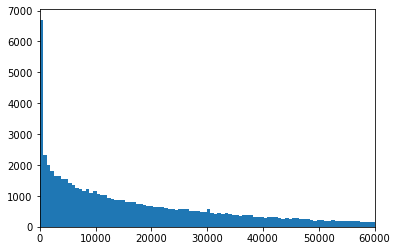

In [190]:
plt.hist(df.groupby(by='user_id')['secs_elapsed'].sum()/60, bins=1000);
plt.xlim(0, 60_000)

In [224]:
df[df['date_account_created']=='no date']

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,first_device_type,first_browser,country_destination,age_imp_values,imputed,action,action_type,action_detail,device_type,secs_elapsed


In [221]:
df['date_account_created'].dt.year

0          2014
1          2014
2          2014
3          2014
4          2014
           ... 
5449845    2014
5449846    2014
5449847    2014
5449848    2014
5449849    2014
Name: date_account_created, Length: 5449850, dtype: int64

In [204]:
df['date_account_created']

0          2014-01-01
1          2014-01-01
2          2014-01-01
3          2014-01-01
4          2014-01-01
              ...    
5449845    2014-06-30
5449846    2014-06-30
5449847    2014-06-30
5449848    2014-06-30
5449849    2014-06-30
Name: date_account_created, Length: 5449850, dtype: object

In [203]:
train['date_account_created'].value_counts(ascending=False)

2014-05-13    672
2014-06-24    670
2014-06-25    636
2014-05-20    631
2014-05-14    621
             ... 
2010-01-31      1
2010-01-28      1
2010-03-09      1
2010-01-19      1
2010-01-23      1
Name: date_account_created, Length: 1633, dtype: int64

In [191]:
# time stamp to datetime
df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'])

In [194]:
df['date_first_booking']

0          2014-01-04
1          2014-01-04
2          2014-01-04
3          2014-01-04
4          2014-01-04
              ...    
5449845       no date
5449846       no date
5449847       no date
5449848       no date
5449849       no date
Name: date_first_booking, Length: 5449850, dtype: object

In [195]:
df['date_first_booking']

0          2014-01-04
1          2014-01-04
2          2014-01-04
3          2014-01-04
4          2014-01-04
              ...    
5449845       no date
5449846       no date
5449847       no date
5449848       no date
5449849       no date
Name: date_first_booking, Length: 5449850, dtype: object